### Installation of Pandas & NumPy and Upload of the data file

In [1]:
!pip install pandas
!pip install numpy

#Importing the pandas and numpy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols


# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Option to display all columns in a dataframe
pd.set_option("display.max_columns", None)

#Option to display all data in a dataframe without scientific format and up to 3 decimal points
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Assignment Activity 1: Make predictions with regression

### Extracting the file and viewing the shape and first 5 rows of the dataframe.

In [19]:
# Extract the file containing Turtle Games review data
reviews=pd.read_csv("/Users/shaunman/Documents/LSE/C3A/LSE_DA301_assignment_files/turtle_reviews.csv")

# First Five Rows
print(reviews.head())

# No of rows and columns within the dataframe 
print(reviews.shape)

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18             12.300                      39             210   
1    Male   23             12.300                      81             524   
2  Female   22             13.120                       6              40   
3  Female   25             13.120                      77             562   
4  Female   33             13.940                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

In [20]:
# Described the Dataframe to get an understanding of the data within.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000,2000.000,2000.000,2000.000,2000.000
mean,39.495,48.079,50.000,1578.032,4320.521
std,13.573,23.124,26.095,1283.240,3148.939
min,17.000,12.300,1.000,25.000,107.000
25%,29.000,30.340,32.000,772.000,1589.250
50%,38.000,47.150,50.000,1276.000,3624.000
75%,49.000,63.960,73.000,1751.250,6654.000
max,72.000,112.340,99.000,6847.000,11086.000


In [21]:
# Indentified the correlation between variables in the dataframe.
reviews.corr()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
age,1.000,-0.006,-0.224,-0.042,0.003
remuneration (k£),-0.006,1.000,0.006,0.616,0.305
spending_score (1-100),-0.224,0.006,1.000,0.672,-0.002
loyalty_points,-0.042,0.616,0.672,1.000,0.184
product,0.003,0.305,-0.002,0.184,1.000


### Identified that there are no missing values within the dataframe.

In [22]:
# Number of NaN values
print(reviews.isna().any(axis=1).sum())


0


### Dropping redundant columns from the dataframe 

In [23]:
# Drop redundant rows from the Dataframe
reviews=reviews.drop('language',axis=1)
reviews=reviews.drop('platform',axis=1)

# Renaming the columns for easier analysis
reviews.columns=['gender', 'age', 'remun', 'sp_score', 'loy_pts', 'education', 'product', 'review', 'summary']


In [24]:
print(reviews.shape)

(2000, 9)


### Filtering Outliers from the dataframe.

In [27]:
from scipy import stats
num_reviews = reviews.select_dtypes(include=["number"])
char_reviews = reviews.select_dtypes(exclude=["number"])

idx = np.all(stats.zscore(num_reviews) < 3, axis=1)
reviews = pd.concat([num_reviews.loc[idx], char_reviews.loc[idx]], axis=1)


In [29]:
print(reviews.shape)

(1975, 9)


### Declaring the Independent and Dependent Variables for Regression Model Analysis.

In [30]:
#Inputing the independent variables
x1=reviews["age"]
x2=reviews["remun"]
x3=reviews["sp_score"]

#Inputting the dependent variables
y1=reviews["loy_pts"]

#Performance of ols test between Age and Loyalty Points
f1 = 'y1 ~ x1'
test1 = ols(f1, data = reviews).fit()

#Performance of ols test between Remuneration and Loyalty Points
f2 = 'y1 ~ x2'
test2 = ols(f2, data = reviews).fit()

#Performance of ols test between Spending Score and Loyalty Points
f3 = 'y1 ~ x3'
test3 = ols(f3, data = reviews).fit()



### OLS Regression Model 1: Age and Loyalty Points

In [31]:
# Output of ols test between Age and Loyalty Points
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.764
Date:                Fri, 23 Dec 2022   Prob (F-statistic):             0.0525
Time:                        21:42:12   Log-Likelihood:                -16792.
No. Observations:                1975   AIC:                         3.359e+04
Df Residuals:                    1973   BIC:                         3.360e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1673.9149     82.298     20.340      0.000    1512.515    1835.315
x1            -3.8210      1.969     -1.940      0.053      -7.683       0.041
==============================================================================
Omnibus:                      415.269   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              730.401
Skew:                           1.343   Prob(JB):                    2.49e-159
Kurtosis:                       4.288   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Extract the estimated parameters, standard errors, and predicted values.

In [32]:
# Extract the estimated parameters.
print("Parameters: ", test1.params)  

# Extract the standard errors.
print("Standard errors: ", test1.bse)  

# Extract the predicted values.
print("Predicted values: ", test1.predict())


Parameters:  Intercept   1673.915
x1            -3.821
dtype: float64
Standard errors:  Intercept   82.298
x1           1.969
dtype: float64
Predicted values:  [1605.13695585 1586.0319587  1589.85295813 ... 1509.61197009 1544.00096497
 1551.64296383]


### Generate the regression table based on the X coefficient and constant values

In [33]:
# Set the the x coefficient to -4.0128 and the constant to 1736.5277 to generate the regression table.
y_pred1 = -4.0128 * x1 + 1736.5177

# Generate the regression table based on the X Coefficient and Constant Values
y_pred1

0      1664.287
1      1644.223
2      1648.236
3      1636.198
4      1604.095
         ...   
1994   1555.942
1995   1588.044
1996   1563.967
1998   1600.082
1999   1608.108
Name: age, Length: 1975, dtype: float64

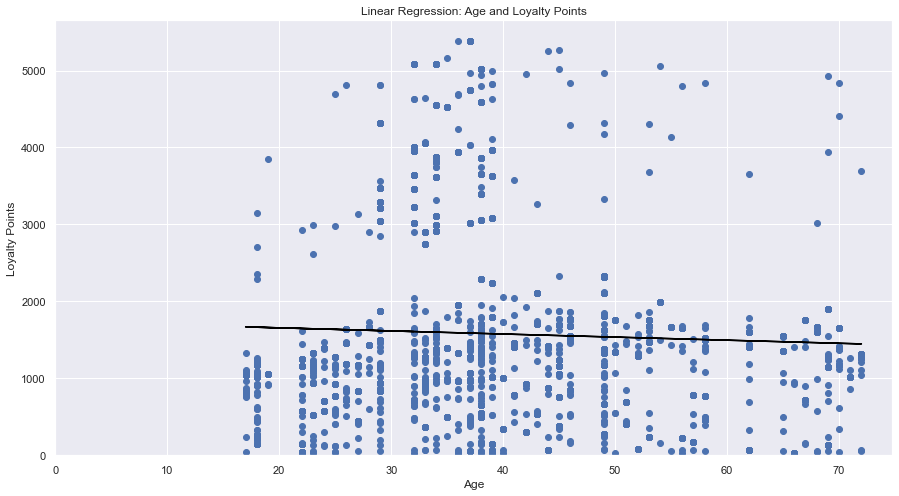

In [108]:
# Plot the data points.
plt.scatter(x1,y1)  

# Plot the regression line (in black).
plt.plot(x1,y_pred1, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)

plt.title( "Linear Regression: Age and Loyalty Points" ) 
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

# View the Linear Regression Model
plt.show()

### OLS Regression Model 2: Remuneration and Loyalty Points

In [35]:
# Output of ols test between Remuneration and Loyalty Points
test2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     1001.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          5.17e-178
Time:                        21:42:40   Log-Likelihood:                -16389.
No. Observations:                1975   AIC:                         3.278e+04
Df Residuals:                    1973   BIC:                         3.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.6615     51.111      1.206      0.228     -38.575     161.898
x2            30.8229      0.974     31.635      0.000      28.912      32.734
==============================================================================
Omnibus:                       33.298   Durbin-Watson:                   3.441
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.439
Skew:                           0.225   Prob(JB):                     6.09e-10
Kurtosis:                       3.560   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Extract the estimated parameters, standard errors, and predicted values.

In [36]:
# Extract the estimated parameters.
print("Parameters: ", test2.params)  

# Extract the standard errors.
print("Standard errors: ", test2.bse)  

# Extract the predicted values.
print("Predicted values: ", test2.predict())

Parameters:  Intercept   61.661
x2          30.823
dtype: float64
Standard errors:  Intercept   51.111
x2           0.974
dtype: float64
Predicted values:  [ 440.78343336  440.78343336  466.05823107 ... 2917.71360936 3094.63719336
 2917.71360936]


### Generate the regression table based on the X coefficient and constant values

In [37]:
# Set the the x coefficient to 34.1878 and the constant to -65.6865 to generate the regression table.
y_pred2 = 34.1878 * x2 - 65.6865

# Generate the regression table based on the X Coefficient and Constant Values
y_pred2


0       354.823
1       354.823
2       382.857
3       382.857
4       410.891
         ...   
1994   2821.815
1995   2821.815
1996   3102.155
1998   3298.393
1999   3102.155
Name: remun, Length: 1975, dtype: float64

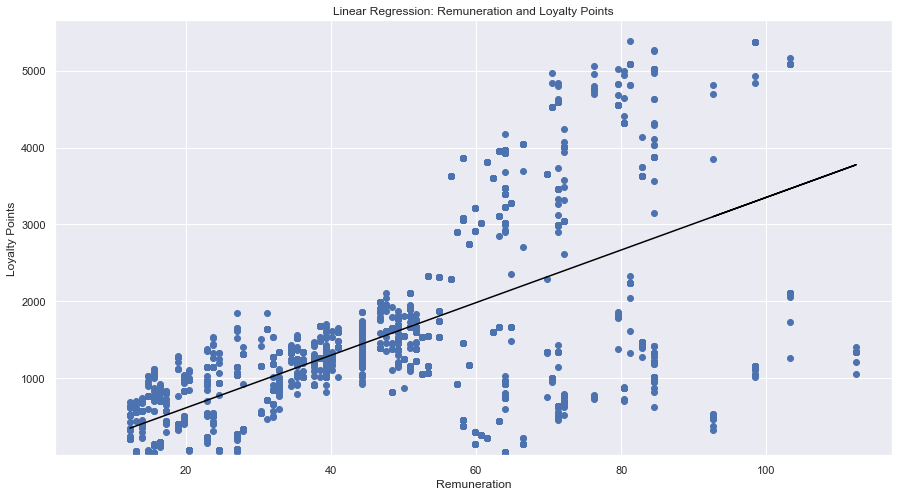

In [117]:
# Plot the data points.
plt.scatter(x2,y1)  

# Plot the regression line (in black).
plt.plot(x2,y_pred2, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)

plt.title( "Linear Regression: Remuneration and Loyalty Points" ) 
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points")


# View the Linear Regression Model
plt.show()

### OLS Regression Model 3: Spending Score and Loyalty Points

In [39]:
# Output of ols test between Spending Score and Loyalty Points
test3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     1618.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          6.87e-259
Time:                        21:42:50   Log-Likelihood:                -16202.
No. Observations:                1975   AIC:                         3.241e+04
Df Residuals:                    1973   BIC:                         3.242e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.5172     42.941     -0.175      0.861     -91.731      76.697
x3            30.8944      0.768     40.226      0.000      29.388      32.401
==============================================================================
Omnibus:                       63.375   Durbin-Watson:                   1.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.895
Skew:                           0.273   Prob(JB):                     1.01e-23
Kurtosis:                       3.995   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Extract the estimated parameters, standard errors, and predicted values.

In [40]:
# Extract the estimated parameters.
print("Parameters: ", test3.params)  

# Extract the standard errors.
print("Standard errors: ", test3.bse)  

# Extract the predicted values.
print("Predicted values: ", test3.predict())

Parameters:  Intercept   -7.517
x3          30.894
dtype: float64
Standard errors:  Intercept   42.941
x3           0.768
dtype: float64
Predicted values:  [1197.3637539  2494.92784778  177.8491087  ...  239.63787507  486.79294058
  239.63787507]


### Generate the regression table based on the X coefficient and constant values

In [41]:
# Set the the x coefficient to 33.0617 and the constant to -75.0527 to generate the regression table.
y_pred3 = 33.0617 * x3 - 75.0527

# Generate the regression table based on the X Coefficient and Constant Values
y_pred3

0      1214.354
1      2602.945
2       123.318
3      2470.698
4      1247.415
         ...   
1994    685.366
1995   2206.205
1996    189.441
1998    453.935
1999    189.441
Name: sp_score, Length: 1975, dtype: float64

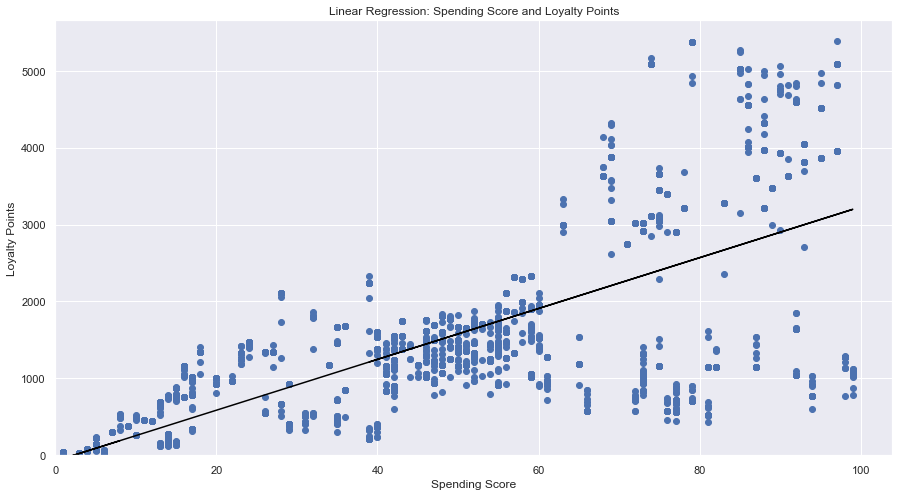

In [110]:
# Plot the data points.
plt.scatter(x3,y1)  

# Plot the regression line (in black).
plt.plot(x3,y_pred3, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)

plt.title( "Linear Regression: Spending Score and Loyalty Points" ) 
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")


# View the Linear Regression Model
plt.show()

## Assignment Activity 2: Make predictions with clustering

In [47]:
# Created a new dataframe containing Turtle Games review data
rev2=reviews

### Sense Check the new dataframe.

In [48]:
# First Five Rows
print(rev2.head())

# No of rows and columns within the dataframe 
print(rev2.shape)

# Described the Dataframe to get an understanding of the data within.
rev2.describe()

   age  remun  sp_score  loy_pts  product  gender education  \
0   18 12.300        39      210      453    Male  graduate   
1   23 12.300        81      524      466    Male  graduate   
2   22 13.120         6       40      254  Female  graduate   
3   25 13.120        77      562      263  Female  graduate   
4   33 13.940        40      366      291  Female  graduate   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4        

,age,remun,sp_score,loy_pts,product
count,1975.000,1975.000,1975.000,1975.000,1975.000
mean,39.505,47.410,49.539,1522.967,4335.212
std,13.628,22.458,25.927,1193.269,3145.893
min,17.000,12.300,1.000,25.000,107.000
25%,29.000,30.340,32.000,772.000,1592.000
50%,38.000,46.740,50.000,1264.000,3629.000
75%,49.000,63.960,72.000,1703.000,6678.000
max,72.000,112.340,99.000,5383.000,11086.000


### Plot the remuneration versus spending score to determine any correlations

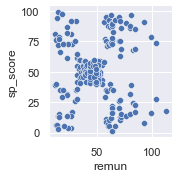

In [49]:
#Assign the size of the plot to be generated
sns.set(rc={'figure.figsize':(15, 8)})

#Creating a pairplot visualizing distribution of reviews based on remuneration and spending score.
bar1=sns.pairplot(data=rev2,x_vars='remun',y_vars='sp_score')

# From viewing the scatterplot, we can identify 5 different possible groups within the graph.

In [50]:
# Create a dataframe containing only the remuneration and Spending_Score for easier analysis
x=rev2[['remun','sp_score']]

## Using Elbow Method to identify the Kmeans

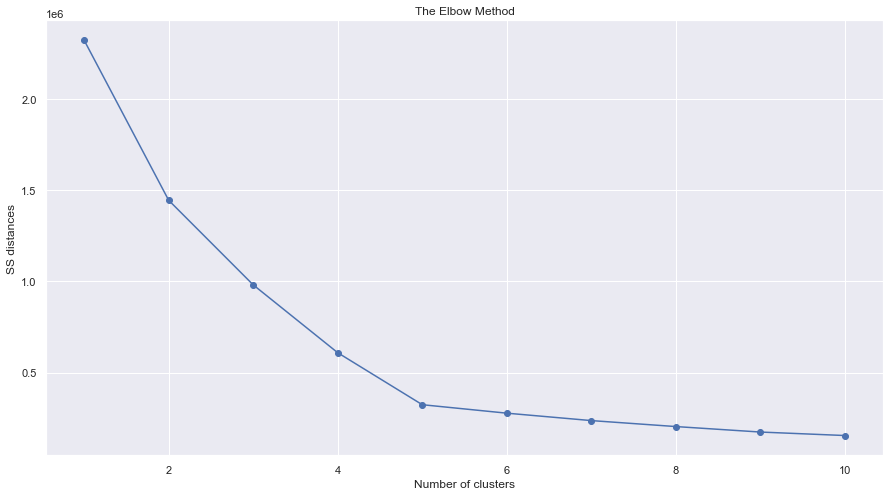

In [51]:
# Import the KMeans class.
from sklearn.cluster import KMeans
# Elbow chart to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                init='k-means++',
                max_iter=2000,
                n_init=10,
                random_state=0)
    kmeans.fit (x)
    ss.append (kmeans.inertia_)
# Plot the elbow method. Plots the sum of squared distances from each point to its assigned centre.
plt.plot (range (1, 11),
          ss,
          marker='o')
# Insert labels and title.
plt.title("The Elbow Method" )
plt.xlabel("Number of clusters")
plt.ylabel("SS distances")
plt.show()

# The graphs' elbow or points of inertia decreasing in a linear fashion is at 5.
# On viewing the graph, we can identify that 5 is the ideal number of clusters.

## Using Silhouette Method to identify the Kmeans

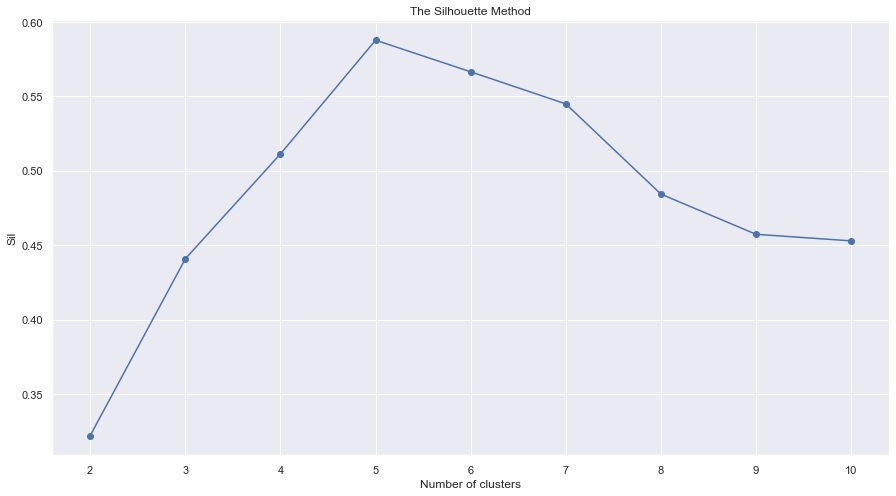

In [52]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10
for k in range (2, kmax+1):
    kmeans_s = KMeans (n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, 
                                labels,
                                metric='euclidean'))
# Plot the silhouette method.
plt.plot (range (2, kmax+1), 
          sil, 
          marker='o')
# Insert labels and title.
plt.title( "The Silhouette Method" ) 
plt.xlabel("Number of clusters")
plt.ylabel("Sil")
plt.show()

# The silhouette method graph peaks at 5 which highlights the ideal number of clusters.
# On viewing the graph, we can identify that 5 is the ideal number of clusters

### Plotting the K-Means Clustering

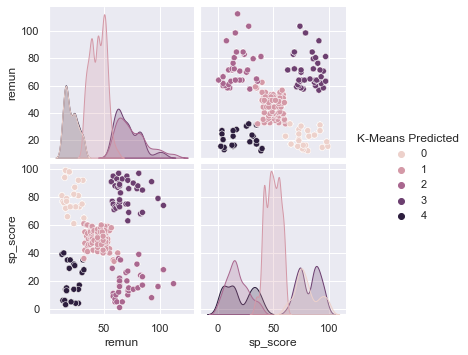

In [58]:
# Using 5 Clusters as per the K means result
kmeans=KMeans(n_clusters=5,
             max_iter=2000,
             init='k-means++',
             random_state=0).fit(x)
clusters=kmeans.labels_
x['K-Means Predicted']=clusters
# Plotting the predicted clusters
sns.pairplot(x,
            hue='K-Means Predicted',
            diag_kind='kde')

In [59]:
# View the K-Means Clusters distribution
x['K-Means Predicted'].value_counts()

1    774
3    331
2    330
4    271
0    269
Name: K-Means Predicted, dtype: int64

## Assignment Activity 3: Analyse customer sentiments with reviews

### Importing the neccessary columns for analysis from the previous dataset.

In [61]:
# Import the previously generated dataset
nlp_data=rev2[['review','summary']].copy()

# Viewing the first 5 rows of dataset
nlp_data.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


### Covert the data to lower case and string for analysis

In [62]:
# Converting the data to lowercase.
nlp_data['review']=nlp_data['review'].apply(lambda x: " ".join(x.lower( ) for x in x.split( )))
print(nlp_data['review'])

nlp_data['summary']=nlp_data['summary'].apply(lambda x: " ".join(x.lower( ) for x in x.split( )))
print(rev2['summary'])

# Convert the Data Type of review and summary columns to string.
nlp_data['review']=nlp_data['review'].astype('string')
nlp_data['summary']=nlp_data['summary'].astype('string')

0       when it comes to a dm's screen, the space on t...
1       an open letter to galeforce9*: your unpainted ...
2       nice art, nice printing. why two panels are fi...
3       amazing buy! bought it as a gift for our new d...
4       as my review of gf9's previous screens these w...
                              ...                        
1994    we are retired and find this a great way to st...
1995    the perfect word game for mixed ages (with mom...
1996    great game. did not think i would like it when...
1998                                            fun game!
1999    this game is fun. a lot like scrabble without ...
Name: review, Length: 1975, dtype: object
0       The fact that 50% of this space is wasted on a...
1       Another worthless Dungeon Master's screen from...
2                         pretty, but also pretty useless
3                                              Five Stars
4                                              Money trap
                              

### Removing punctuation from the data

In [63]:
# Import the re module for punctuation removal.
import re

#Replacing the punctuation in each line of the data
nlp_data['review']=nlp_data['review'].str.replace('[^\w\s]','')
print(nlp_data['review'])

nlp_data['summary']=nlp_data['summary'].str.replace('[^\w\s]','')
print(nlp_data['summary'])


0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9 your unpainted mi...
2       nice art nice printing why two panels are fill...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1994    we are retired and find this a great way to st...
1995    the perfect word game for mixed ages with mom ...
1996    great game did not think i would like it when ...
1998                                             fun game
1999    this game is fun a lot like scrabble without a...
Name: review, Length: 1975, dtype: string
0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              

### Removing duplicates from the data

In [64]:
# Dropping the duplicates within the 'review' and 'summary' columns
nlp_data=nlp_data.drop_duplicates(subset='review')
nlp_data=nlp_data.drop_duplicates(subset='summary')

nlp_data.reset_index(inplace=True)
nlp_data.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [65]:
# Create a new string variable for review column
rev_text=''

for i in range(nlp_data.shape[0]):
    rev_text=rev_text+nlp_data['review'][i]
    
print(rev_text)

when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completelyan open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could ha

In [66]:
# Create a new string variable for review column
summ_text=''

for i in range(nlp_data.shape[0]):
    summ_text=summ_text+nlp_data['summary'][i]
    
print(summ_text)

the fact that 50 of this space is wasted on art and not terribly informative or needed art another worthless dungeon masters screen from galeforce9pretty but also pretty uselessfive starsmoney trapbest gm screen evergreat but could be even betteranother missed opportunity not a value add to the product linelove the mapnot a general dm screenvery weak gamefell completely flatgood bookbuckley was a card mommervery advanced but as good as it getsyou better know what youre getting intodont botherthe worst value ive ever seennot enough productgood product buttemporary tattoos were good gifthuge hitgorgeous pictureswonderful designswow great coloring booknice bookgreat picturesperfectwell donemy relaxationbeautiful coloring bookthe pictures are great ive done one and gave it to a great buy cant wait to work on this bookstained glass perfectionfour starsso beautifulvery nicethree starsi like every image contained in this stained glass coloring bookcreative stained glass picturesnice pictures 

## Creating WordCloud for the review and summary columns

### Installing the required packages and libraries

In [68]:
# Install wordcloud
!pip install wordcloud

# Importing the wordcloud libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

### WordCloud for Reviews

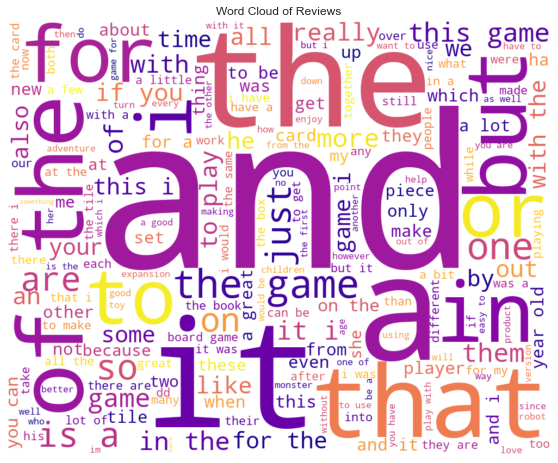

In [69]:
# Create a WordCloud for the review column
wordcloud_rev = WordCloud(width=1000,
                          height=800,
                          background_color="white",
                          colormap='plasma',
                          stopwords='None',
                         min_font_size=10).generate(rev_text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud_rev, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Reviews')
plt.show()

### WordCloud for Summaries

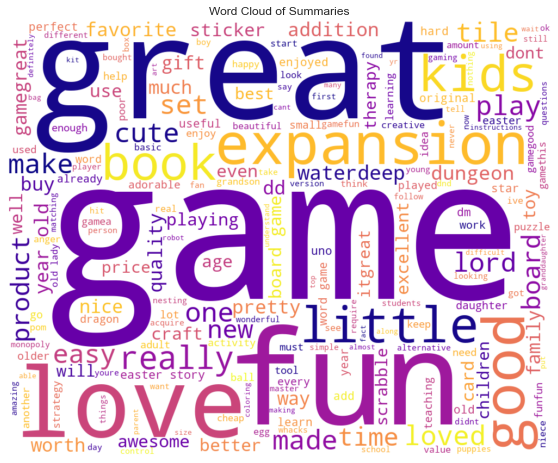

In [70]:
# Create a WordCloud for the summary column
wordcloud_summary = WordCloud(width=1000,height=800,background_color="white",colormap='plasma').generate(summ_text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Summaries')
plt.show()

### Import the neccessary libraries for Tokensiation

In [99]:
!pip install nltk

# Import the library.
import nltk

# Install the required tokenisation function.
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Install the required tokenisation model.
nltk.download('punkt')
# Download the stopwards package
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/shaunman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shaunman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Tokenisation of the dataset.

In [120]:
# Tokenize the review and summary columns
nlp_data['rev_token']=nlp_data['review'].apply(word_tokenize)
nlp_data['summ_token']=nlp_data['summary'].apply(word_tokenize)

# View the first 5 columns of the tokenized review and summary columns.
nlp_data['rev_token'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: rev_token, dtype: object

In [121]:
# View the first 5 columns of the tokenized summary columns.
nlp_data['summ_token'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summ_token, dtype: object

In [122]:
# Create a list to add all review tokens
all_rtokens=[]

# Create a list to add all summary tokens
all_stokens=[]

# Compile all review column tokens
for i in range(nlp_data.shape[0]):
    all_rtokens=all_rtokens+nlp_data['rev_token'][i]

# Compile all review column tokens
for i in range(nlp_data.shape[0]):
    all_stokens=all_stokens+nlp_data['summ_token'][i]

### Frequency Distribution of Reviews

In [123]:
# Import the Frequency Distribution
from nltk.probability import FreqDist

fdist1=FreqDist(all_rtokens)
print(fdist1)


<FreqDist with 7159 samples and 99950 outcomes>


### Frequency Distribution of Summaries

In [124]:
fdist2=FreqDist(all_stokens)
print(fdist2)

<FreqDist with 1536 samples and 7964 outcomes>


### Filtering Stop Words and Alphanumeric words from the dataset.

In [125]:
# Create a list containing non alphanumeric words
rtokens1=[word for word in all_rtokens if word.isalnum()]
stokens1=[word for word in all_stokens if word.isalnum()]

In [126]:
# Assign the english stopwords to a variable
stop_words=set(stopwords.words('English'))

# Create a filtered list excluding stop words and alphanumeric words
r_tokens= [x for x in rtokens1 if x not in stop_words]
s_tokens= [x for x in stokens1 if x not in stop_words]

# Define Empty variable string
rtokens_final=''
stokens_final=''

# Add each filtered token to the string
for value in r_tokens:
    rtokens_final=rtokens_final+value+" "
    
for value in s_tokens:
    stokens_final=stokens_final+value+" "

### WordCloud for Reviews (Filtered for Stopwords and Alphanumeric words)

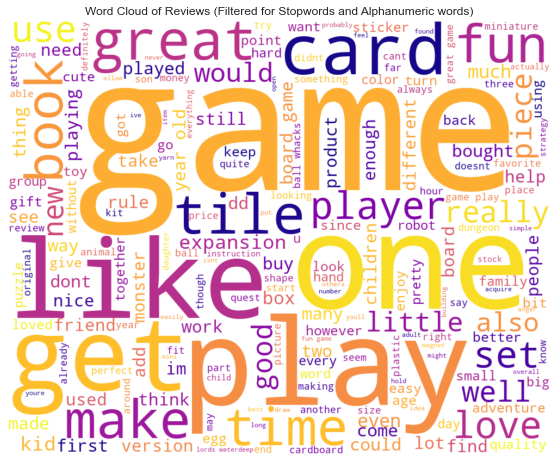

In [127]:
# Create a WordCloud for the review column
wordcloud_rev = WordCloud(width=1000,
                          height=800,
                          background_color="white",
                          colormap='plasma',
                          stopwords='None',
                         min_font_size=10).generate(rtokens_final)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud_rev, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Reviews (Filtered for Stopwords and Alphanumeric words)')
plt.show()

### WordCloud for Summary (Filtered for Stopwords and Alphanumeric words)

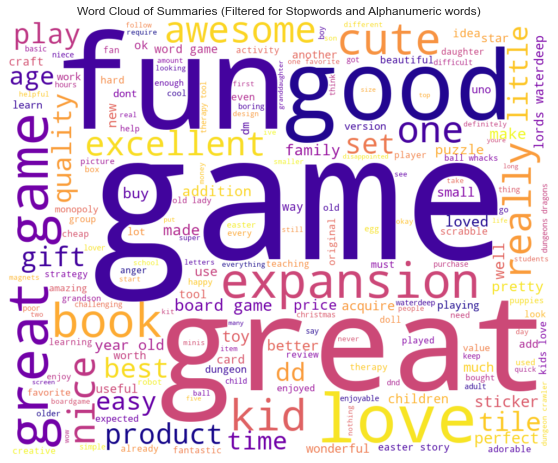

In [128]:
# Create a WordCloud for the summary column
wordcloud_summary = WordCloud(width=1000,height=800,background_color="white",colormap='plasma').generate(stokens_final)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Summaries (Filtered for Stopwords and Alphanumeric words)')
plt.show()

## Identify the 15 most common words used

In [129]:
# Import the Counter class
from collections import Counter

# Generate a dataframe from Counter containing Frequency of words in the 'review' column
rcounts=pd.DataFrame(Counter(r_tokens).most_common(15),
                    columns=['Word','Frequency']).set_index('Word')
rcounts

,Frequency
Word,
game,1348
one,471
play,440
fun,402
great,388
like,368
get,290
tiles,279
cards,278


In [130]:

# Generate a dataframe from Counter containing Frequency of words in the 'review' column
scounts=pd.DataFrame(Counter(s_tokens).most_common(15),
                    columns=['Word','Frequency']).set_index('Word')
scounts

,Frequency
Word,
game,266
great,231
fun,173
good,84
love,70
like,51
kids,47
book,42
expansion,42


### Plot the Most Common Words

Text(0.5, 1.0, 'Most Common Words among reviews in the Turtle Game Reviews')

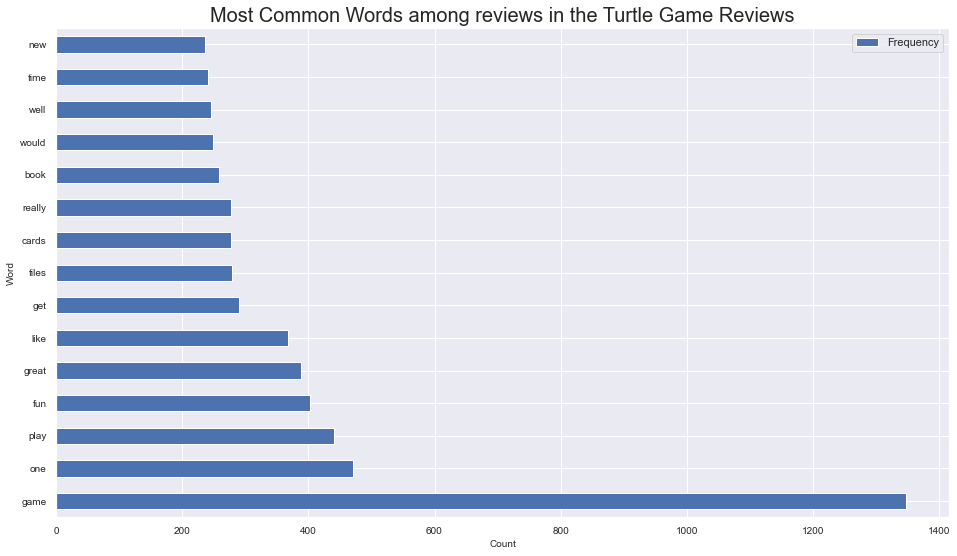

In [131]:
# Setting the plot to view the most common words in the 'review' column
rplot=rcounts.plot(kind='barh',figsize=(16,9),fontsize=10)

rplot.set_xlabel('Count',fontsize=10)
rplot.set_ylabel('Word',fontsize=10)
rplot.set_title('Most Common Words among reviews in the Turtle Game Reviews',fontsize=20)



Text(0.5, 1.0, 'Most Common Words among Summaries in the Turtle Game Reviews')

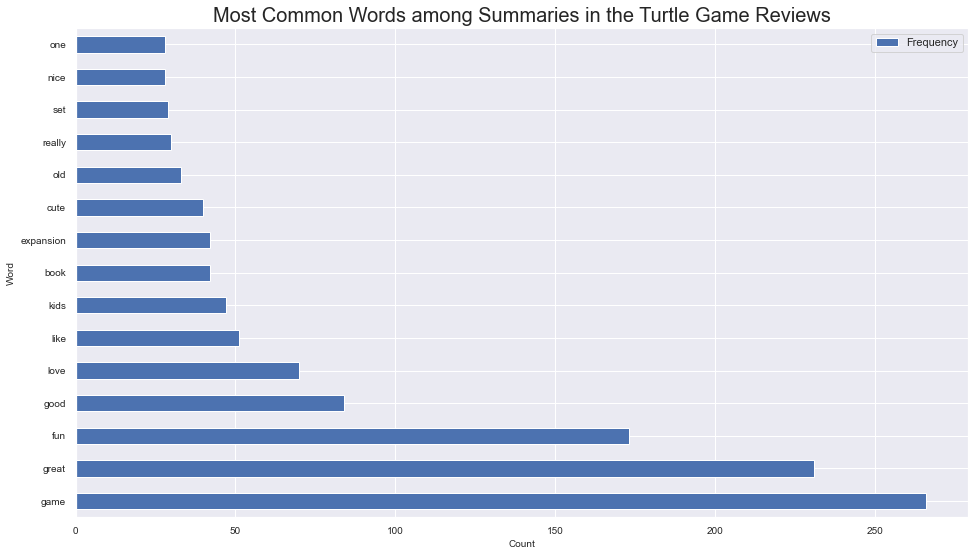

In [132]:
# Setting the plot to view the most common words in the 'summary' column
splot=scounts.plot(kind='barh',figsize=(16,9),fontsize=10)

splot.set_xlabel('Count',fontsize=10)
splot.set_ylabel('Word',fontsize=10)
splot.set_title('Most Common Words among Summaries in the Turtle Game Reviews',fontsize=20)



## Sentiment Polarity Calculation

### Installing the tools and libraries

In [133]:
# Install vaderSentiment tool.
!pip install vaderSentiment

# Import the necessary class.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an object from the class.
sia = SentimentIntensityAnalyzer()

### Calculation of Sentiment Polarity of the Review Column

In [134]:
# Create a list to input tokenized sentence for sentiment analysis for 'review' column
rev_senti=[]

# Filter the list for Stop Words and Alphanumeric words
rev_senti= [[y.lower() for y in x if y.lower() not in stop_words and y.isalpha()] for x in nlp_data['rev_token']]

# Calculate the polarity of the 'summary' column
r_polar_scores = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in rev_senti}
r_polarity = pd.DataFrame(r_polar_scores).T
r_polarity

,neg,neu,pos,compound
comes dms screen space screen absolute premium fact space wasted art terribly informative needed art well makes completely useless reason gave stars technically speaking least still stand block notes dice rolls drops ball completely,0.291,0.661,0.048,-0.893
open letter unpainted miniatures bad spell cards great board games meh dm screens however freaking terrible im still waiting single screen isnt polluted pointless artwork useful referenceable tables youve created single use screen useful running storm kings thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted artwork bloated overland map could easily reduced single panel size table nighuseless short stop making crap dm screens,0.206,0.539,0.254,0.702
nice art nice printing two panels filled general forgotten realms map beyond one blue ocean waste dont understand cant make dm screens useful kinds adventures rather solely specific adventure youre supposed able transpose adventure lands outside forgotten realms even list new monsters npcs would least useful map even would stuff related running game broaduse stuff related giants thing curse strahd make useful raven loft undead horror campaigns general instead huge amount screen space solely mapping castle ravenloft useful small fraction time even curse strahd adventure let alone various ravenloft adventuring really kill extended use screens thinking potential use adventure question well use broader sense rage demons screen far useful broad dark adventuring covering lot rules various conditions may suffer map one panel storm giants one decent tables includes really misses mark maybe ask dms would use,0.195,0.590,0.215,0.204
amazing buy bought gift new dm perfect,0.000,0.278,0.722,0.886
review previous screens completely unnecessary nearly useless skip definition waste money,0.394,0.606,0.000,-0.706
...,...,...,...,...
fun card game people like words artwork cards letter absolutely beautiful try,0.000,0.474,0.526,0.875
fun family make certain agree dictionary front makes big difference,0.000,0.470,0.530,0.784
great game keep mind active play year old motherinlaw dont adhere strictly rules sometimes help rearrange letters get higher scores everyone likes higher scores strategy remember bonus points longest work words,0.000,0.579,0.421,0.953
retired find great way stay alert spelling vocabulary also need use math keep score great game brain,0.000,0.574,0.426,0.886


### Calculation of Sentiment Polarity of the Summary Column

In [135]:
# Create a list to input tokenized sentence for sentiment analysis for 'summary' column
summ_senti=[]

# Filter the list for Stop Words and Alphanumeric words
summ_senti= [[y.lower() for y in x if y.lower() not in stop_words and y.isalpha()] for x in nlp_data['summ_token']]

# Calculate the polarity of the 'summary' column
s_polar_scores = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in summ_senti}
s_polarity = pd.DataFrame(s_polar_scores).T
s_polarity

,neg,neu,pos,compound
fact space wasted art terribly informative needed art,0.531,0.469,0.000,-0.778
another worthless dungeon masters screen,0.420,0.580,0.000,-0.440
pretty also pretty useless,0.275,0.098,0.627,0.557
five stars,0.000,1.000,0.000,0.000
money trap,0.697,0.303,0.000,-0.318
...,...,...,...,...
fun card game people like words,0.000,0.408,0.592,0.700
sort card game equivalent scrabble lot easier,0.000,0.682,0.318,0.421
great game keep mind active,0.000,0.306,0.694,0.778
great mind game,0.000,0.328,0.672,0.625


In [136]:
# Execute the describe function for the reviews to show the distribution and moments. 
# The average is 0.691 is strongly positive
r_polarity['compound'].describe()

count   1331.000
mean       0.694
std        0.372
min       -0.942
25%        0.628
50%        0.836
75%        0.934
max        0.999
Name: compound, dtype: float64

In [137]:
# Execute the describe function for the summaries to show the distribution and moments. 
# The average is 0.391 is weakly positive
s_polarity['compound'].describe()

count   1275.000
mean       0.397
std        0.340
min       -0.888
25%        0.000
50%        0.511
75%        0.625
max        0.952
Name: compound, dtype: float64

### Viewing the top 20 most positive reviews

In [138]:
# Viewing the top 20 most positive reivews
r_polarity.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
fun gift,0.000,0.000,1.000,0.735
entertaining,0.000,0.000,1.000,0.440
cute,0.000,0.000,1.000,0.459
great,0.000,0.000,1.000,0.625
perfect,0.000,0.000,1.000,0.572
liked,0.000,0.000,1.000,0.421
fun,0.000,0.000,1.000,0.511
gift recipients loved,0.000,0.128,0.872,0.778
fun good service,0.000,0.139,0.861,0.735
gorgeous love book pictures beautiful,0.000,0.142,0.858,0.920


### Viewing the top 20 most positive summaries

In [139]:
# Viewing the top 20 most positive summaries
s_polarity.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
fantastic,0.000,0.000,1.000,0.557
ok best,0.000,0.000,1.000,0.751
wonderful,0.000,0.000,1.000,0.572
fun useful,0.000,0.000,1.000,0.735
ok great,0.000,0.000,1.000,0.743
beautiful,0.000,0.000,1.000,0.599
nice,0.000,0.000,1.000,0.421
brilliant,0.000,0.000,1.000,0.586
great fun,0.000,0.000,1.000,0.813
super fun,0.000,0.000,1.000,0.802


### Viewing the top 20 most negative reviews

In [140]:
# Viewing the top 20 most negative reivews
r_polarity.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
crappy cardboard ghost original hard believe shame hasbro disgusting,0.723,0.157,0.120,-0.888
incomplete kit disappointing,0.615,0.385,0.000,-0.494
yearold granddaughter frustrated discouraged attempting craft definitely young child difficulty understanding directions disappointed,0.520,0.359,0.121,-0.836
got product damaged condition,0.492,0.508,0.000,-0.440
uno questions anger okay way discuss anger gets repetitive students start get bored half round,0.491,0.427,0.081,-0.863
bought thinking would really fun disappointed really messy isnt nearly easy seems also glue useless year old instructions difficult,0.455,0.427,0.118,-0.851
flimsy get pay,0.412,0.588,0.000,-0.103
hard put together,0.412,0.588,0.000,-0.103
review previous screens completely unnecessary nearly useless skip definition waste money,0.394,0.606,0.000,-0.706
im ot intended using aggressive kiddos used even frustrated repetitive asking questions different format,0.389,0.611,0.000,-0.718


### Viewing the top 20 most negative summaries

In [141]:
# Viewing the top 20 most negative summaries
s_polarity.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
frustrating,1.000,0.000,0.000,-0.440
disappointing,1.000,0.000,0.000,-0.494
boring,1.000,0.000,0.000,-0.318
worn,1.000,0.000,0.000,-0.296
meh,1.000,0.000,0.000,-0.077
disappointed,1.000,0.000,0.000,-0.477
defective poor qc,0.857,0.143,0.000,-0.718
sided die,0.796,0.204,0.000,-0.599
bad expecting,0.778,0.222,0.000,-0.542
uno angry,0.767,0.233,0.000,-0.511


## Histogram depicting the Sentiment Polarity of Reviews

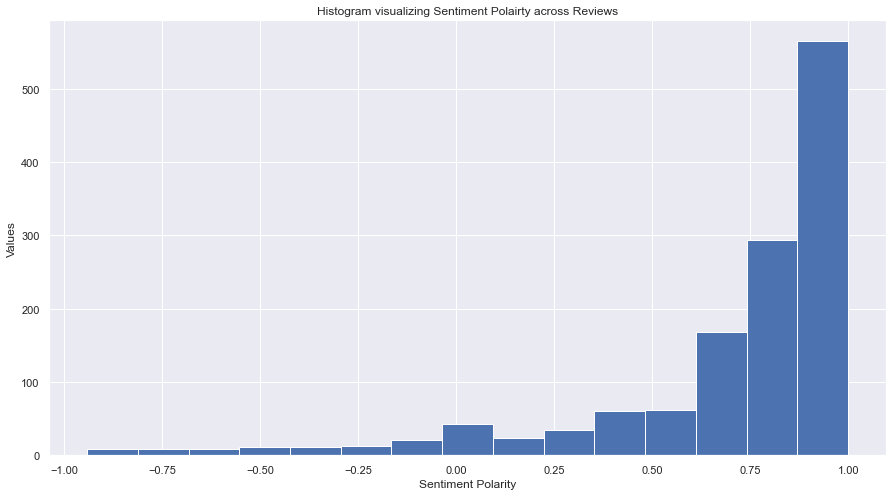

In [142]:
# View the sentiment polarity of reviews in the form of a histogram:
plt.hist(r_polarity['compound'], bins=15)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Values')
plt.title('Histogram visualizing Sentiment Polairty across Reviews')
plt.show()

## Histogram depicting the Sentiment Polarity of Summaries

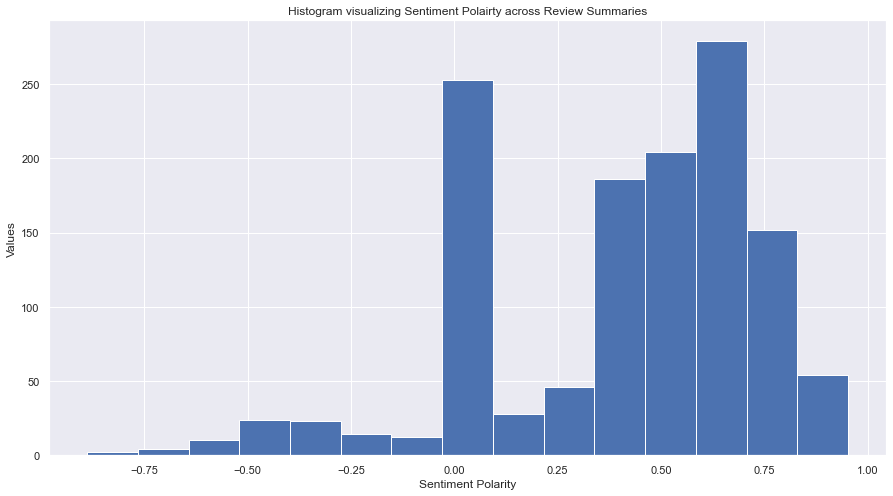

In [574]:
# View the sentiment polarity of summaries in the form of a histogram:
plt.hist(s_polarity['compound'], bins=15)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Values')
plt.title('Histogram visualizing Sentiment Polairty across Review Summaries')
plt.show()